# Featurization, Model Selection and Tuning Project

# 1. Import and understand the data. 

### A. Import ‘BankChurners.csv’ as DataFrame.

In [115]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, accuracy_score, confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

import pickle

In [11]:
#import BankChurners.csv file
data = pd.read_csv('BankChurners-1.csv')

In [12]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

### B. Check the info of the dataset and also check if any duplicate records in the data. 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [16]:
duplicate_count = data.duplicated().sum()
print("No. of duplicate records in the data = ",duplicate_count)

No. of duplicate records in the data =  0


There is no duplicate records in the data.

### C. Print the 5-point summary of the data and share your insights on data distribution.

In [17]:
data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [19]:
data.shape

(10127, 21)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### D. Print the unique values of all the categorical columns in the dataset. Share your observations.

In [22]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [25]:
for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")
    
print('-'*90)

Unique values in 'Attrition_Flag': ['Existing Customer' 'Attrited Customer']
Unique values in 'Gender': ['M' 'F']
Unique values in 'Education_Level': ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
Unique values in 'Marital_Status': ['Married' 'Single' nan 'Divorced']
Unique values in 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']
Unique values in 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']
------------------------------------------------------------------------------------------


1. The dataset distinguishes between "Existing Customer" and "Attrited Customer," indicating that it is likely focused on customer retention and churn analysis.
2. The presence of both genders (M and F) suggests a diverse customer base.
3. The dataset includes a range of education levels, from "Uneducated" to "Doctorate."
4. With categories like "Married," "Single," and "Divorced," you can explore how marital status correlates with spending habits or service usage, which can inform targeted marketing efforts.
5. The income categories range from "Less than $40K" to "$120K +," indicating a wide economic spectrum among customers.
6. The dataset includes several card types (Blue, Gold, Silver, Platinum), suggesting that it may be part of a financial services or credit card company’s dataset.

### E. Check for the % of missing values in the dataset. Do not treat the missing values here.

In [27]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

CLIENTNUM                    0.000000
Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category              0.000000
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64


In [28]:
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Education_Level    14.999506
Marital_Status      7.396070
dtype: float64


This two columns in the dataset has the missing values and the percentage of missing values are as mentioned above.

## 2. Data Pre-processing.

### A. Drop redundant columns from the data.

In [29]:
# Drop "CLIENTNUM", "Total_Amt_Chng_Q4_Q1" and "Total_Ct_Chng_Q4_Q1" columns
df = data.drop(columns=["CLIENTNUM","Total_Amt_Chng_Q4_Q1","Total_Ct_Chng_Q4_Q1"])
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  \
0       12691.0                  777          11914.0             1144   
1        8256.0                  864           7392.0             1291   
2        3418.0                    0           3418.0             1887   
3        3313.0                 2517            796.0             1171   
4        4716.0                    0           4716.0              816   

   Total_Trans_Ct  Avg_Utilization_Ratio  
0              42                  0.061  
1              33                  0.105  
2              20                  0.000  
3              20                  0.760  
4              28                  0.000

### B. Encode the Existing and Attrited customers to 0 and 1 respectively in the ‘Attrition_Flag’ variable.

In [30]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  \
0       12691.0                  777          11914.0             1144   
1        8256.0                  864           7392.0             1291   
2        3418.0                    0           3418.0             1887   
3        3313.0                 2517            796.0             1171   
4        4716.0                    0           4716.0              816   

   Total_Trans_Ct  Avg_Utilization_Ratio  
0              42                  0.061  
1              33                  0.105  
2              20                  0.000  
3              20                  0.760  
4              28                  0.000

## 3. Exploratory Data Analysis.

### A. Perform Univariate and Multivariate analysis on the data. Share your insights.

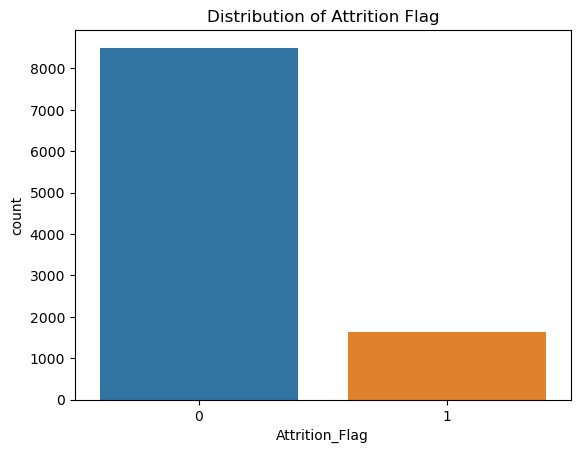

In [31]:
# Univariate Analysis

# Visualizing categorical variables
sns.countplot(data=df, x='Attrition_Flag')
plt.title('Distribution of Attrition Flag')
plt.show()

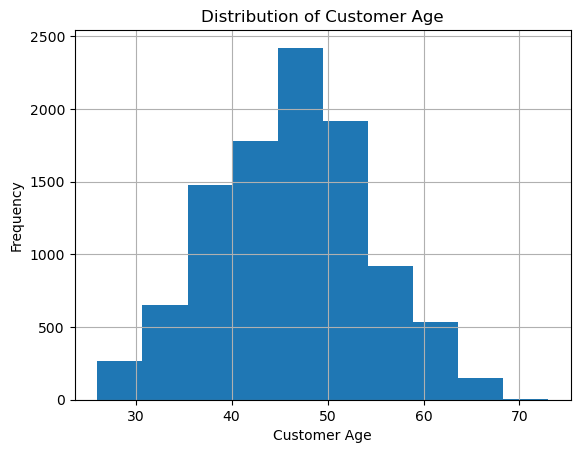

In [32]:
# Visualizing numerical variables
df['Customer_Age'].hist(bins=10)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Multivariate Analysis

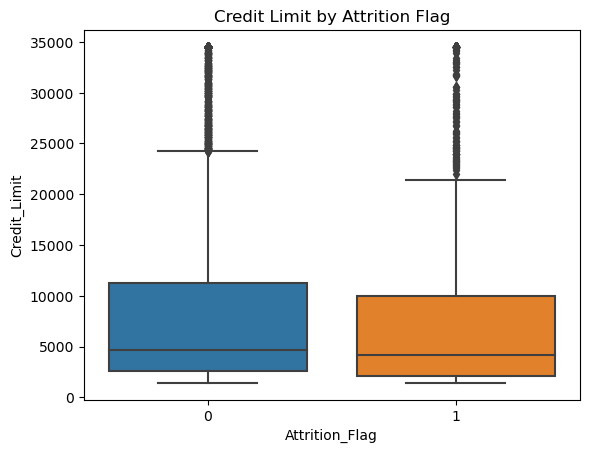

In [34]:
# Boxplot - To compare distributions of numerical variables based on a categorical variable
sns.boxplot(data=df, x='Attrition_Flag', y='Credit_Limit')
plt.title('Credit Limit by Attrition Flag')
plt.show()

C:\Users\fenuj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


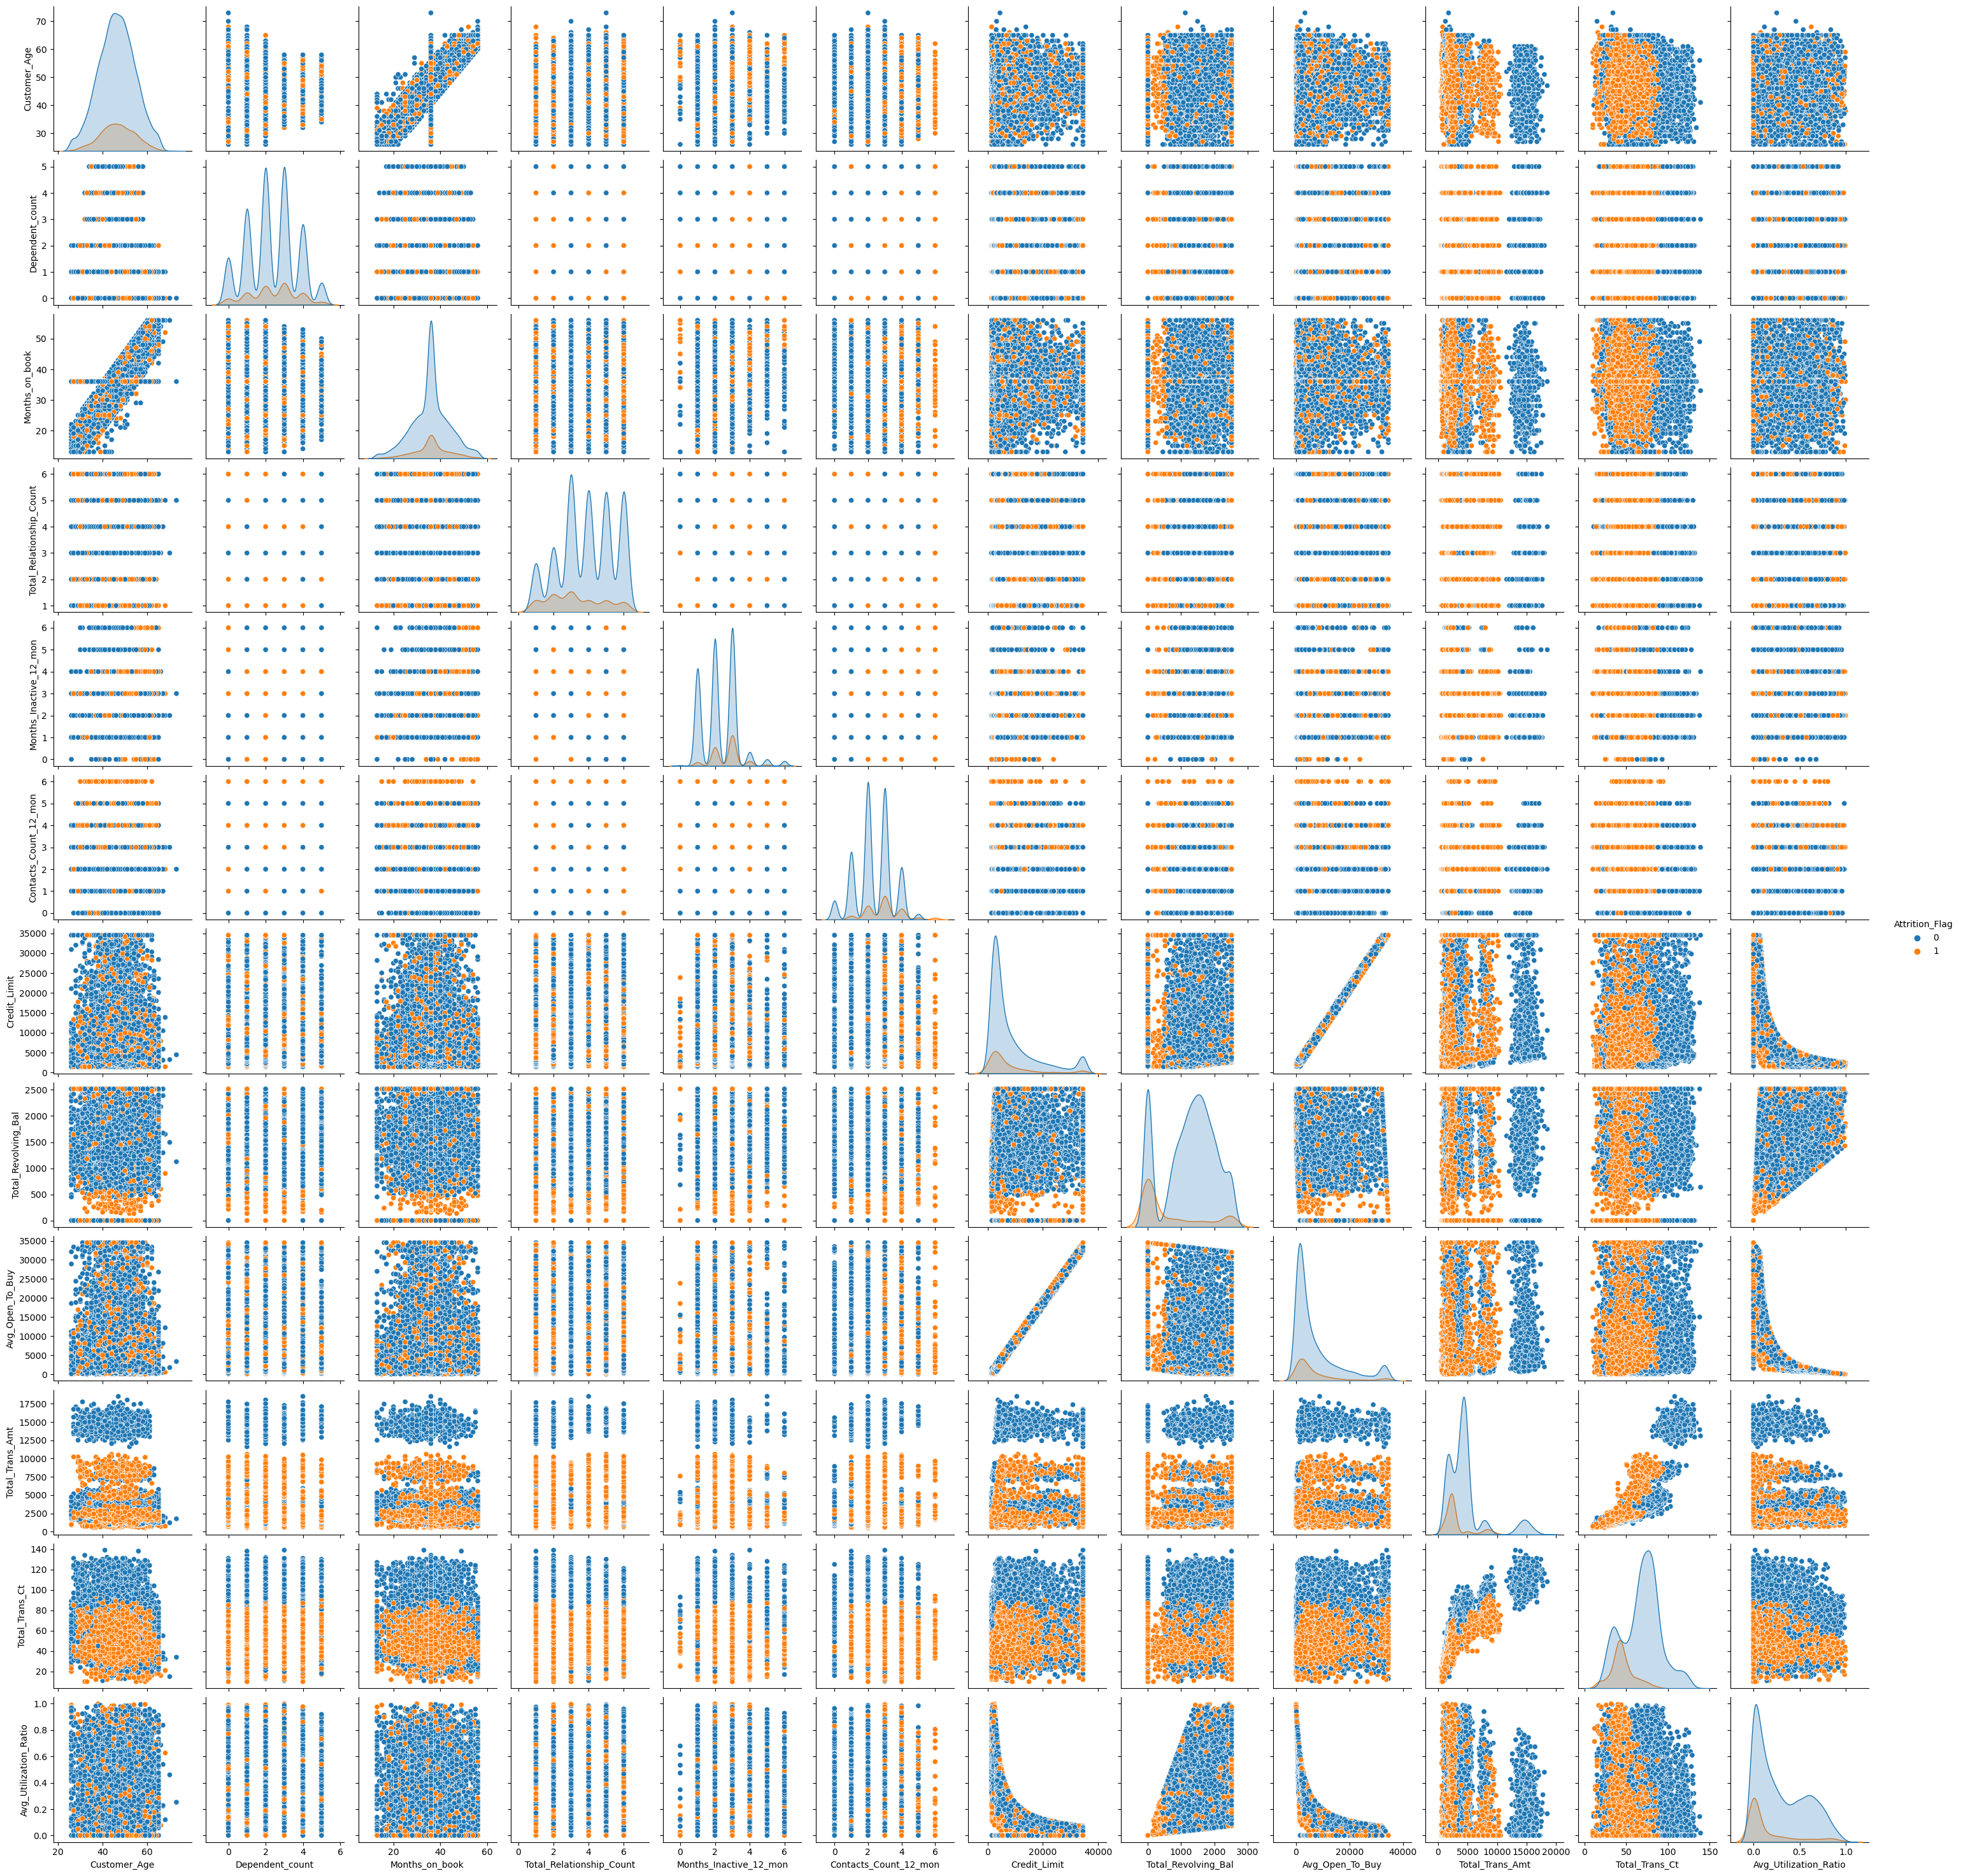

In [37]:
# Pairplot - To visualize relationships between multiple numerical variables and the Attrition_Flag
sns.pairplot(df, hue='Attrition_Flag')
plt.show()

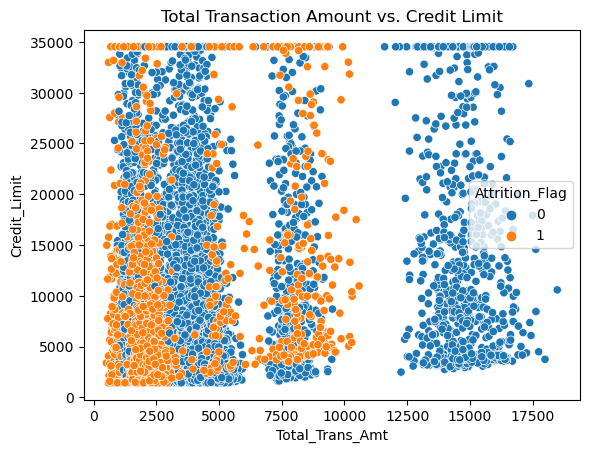

In [41]:
# Scatter Plot - To visualize the relationship between two numerical variables
sns.scatterplot(data=df, x='Total_Trans_Amt', y='Credit_Limit', hue='Attrition_Flag')
plt.title('Total Transaction Amount vs. Credit Limit')
plt.show()

## 4. Data Preparation.

### A. Find the percentage of outliers, in each column of the data.

In [42]:
def outlier_percentage(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    
    outliers = (column < lower_bound) | (column > upper_bound)
    return (outliers.sum() / len(column)) * 100

outlier_percentages = df.select_dtypes(include = ['float64','int64']).apply(outlier_percentage)

print(outlier_percentages)

Attrition_Flag               16.065962
Customer_Age                 90.925249
Dependent_count              91.073368
Months_on_book               90.026661
Total_Relationship_Count     78.740002
Months_Inactive_12_mon       77.950035
Contacts_Count_12_mon        85.197986
Credit_Limit                100.000000
Total_Revolving_Bal         100.000000
Avg_Open_To_Buy             100.000000
Total_Trans_Amt              99.012541
Total_Trans_Ct               95.398440
Avg_Utilization_Ratio       100.000000
dtype: float64


### B. Replace 'abc' values with 'np.nan' in Income_Category column.

In [43]:
df['Income_Category'].replace('abc', np.nan, inplace=True)

In [44]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  \
0       12691.0                  777          11914.0             1144   
1        8256.0                  864           7392.0             1291   
2        3418.0                    0           3418.0             1887   
3        3313.0                 2517            796.0             1171   
4        4716.0                    0           4716.0              816   

   Total_Trans_Ct  Avg_Utilization_Ratio  
0              42                  0.061  
1              33                  0.105  
2              20                  0.000  
3              20                  0.760  
4              28                  0.000

### C. Separate Target and Predictor variables.

In [47]:
# Define target variable
y = df['Attrition_Flag']

# Define predictor variables
X = df.drop(columns=['Attrition_Flag'])

# Optionally, reset the index of the target variable
y.reset_index(drop=True, inplace=True)

## 5. Split data into train, validation and test set.

### A. Split data into 2 parts, say temporary and test. Please use below line of code.

In [48]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### B. Now split the temporary set into train and validation. Please use below line of code.

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

## 6. Missing value Imputation. 

### A. Impute all missing values in "Education_Level", "Marital_Status", "Income_Category" columns using suitable techniques from X_train, X_val, X_test separately

In [51]:
# List of categorical columns to impute
categorical_cols = ["Education_Level", "Marital_Status", "Income_Category"]

# Create an imputer for categorical data using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data and transform the training set
X_train[categorical_cols] = imputer.fit_transform(X_train[categorical_cols])

# Transform the validation and test sets using the same imputer
X_val[categorical_cols] = imputer.transform(X_val[categorical_cols])
X_test[categorical_cols] = imputer.transform(X_test[categorical_cols])

## 7. Encoding Categorical columns.

### A. Encode all Categorical columns in X_train, X_val, X_test using one-hot encoding.

In [59]:
all_categorical_cols = ["Education_Level", "Marital_Status", "Income_Category","Gender","Card_Category"]

# One-hot encode categorical columns in X_train
X_train_encoded = pd.get_dummies(X_train, columns=all_categorical_cols, drop_first=True)

# One-hot encode categorical columns in X_val
X_val_encoded = pd.get_dummies(X_val, columns=all_categorical_cols, drop_first=True)

# One-hot encode categorical columns in X_test
X_test_encoded = pd.get_dummies(X_test, columns=all_categorical_cols, drop_first=True)

# Align columns of X_val and X_test with X_train
X_val_encoded, X_test_encoded = X_val_encoded.align(X_train_encoded, join='left', axis=1, fill_value=0)

## 8. Model Building 

### A. Build a Decision Tree, Logistic regression, Random Forest, Gradient Boost and XG Boost model on train data.

In [87]:
# List to store models and their names
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)
}

# Fit each model and evaluate recall
for model_name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_val_encoded)
    
    recall = recall_score(y_val, y_pred, pos_label=1)
    print(f"{model_name} Recall: {recall:.4f}")
    print(classification_report(y_val, y_pred))

Decision Tree Recall: 0.7577
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1700
           1       0.76      0.76      0.76       326

    accuracy                           0.92      2026
   macro avg       0.86      0.86      0.86      2026
weighted avg       0.92      0.92      0.92      2026

Logistic Regression Recall: 0.5245
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1700
           1       0.75      0.52      0.62       326

    accuracy                           0.89      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.89      0.89      0.89      2026

Random Forest Recall: 0.7822
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1700
           1       0.91      0.78      0.84       326

    accuracy                           0.95      2026
   macro avg       0.94      0.88  

C:\Users\fenuj\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Recall: 0.8405
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1700
           1       0.88      0.84      0.86       326

    accuracy                           0.96      2026
   macro avg       0.93      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



### B. Validate the models built above on Validation set.

In [88]:
# Dictionary to store results
validation_results = {}

# Validate each model on the validation set
for model_name, model in models.items():
    # Make predictions
    y_val_pred = model.predict(X_val_encoded)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_val, y_val_pred)
    }

# Print validation results
print("Validation Results:")
for name, metrics in validation_results.items():
    print(f"\n{model_name} Accuracy: {metrics['accuracy']:.4f}")
    print(f"{metrics['classification_report']}")

Validation Results:

XGBoost Accuracy: 0.9225
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1700
           1       0.76      0.76      0.76       326

    accuracy                           0.92      2026
   macro avg       0.86      0.86      0.86      2026
weighted avg       0.92      0.92      0.92      2026


XGBoost Accuracy: 0.8949
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1700
           1       0.75      0.52      0.62       326

    accuracy                           0.89      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.89      0.89      0.89      2026


XGBoost Accuracy: 0.9526
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1700
           1       0.91      0.78      0.84       326

    accuracy                           0.95      2026
   macro avg       0.94      0

### C. Mention which model is giving us better recall score.

Based on the validation results, here’s the recall for each model:

Decision Tree Recall: 0.7577
Logistic Regression Recall: 0.5245
Random Forest Recall: 0.7822
Gradient Boosting Recall: 0.8282
XGBoost Recall: 0.8405

The model with the best recall score is XGBoost with a recall of 0.8405. This indicates that XGBoost is the most effective model in identifying positive cases among the models evaluated.

### D. Try target balancing with Up sampling the data. Build all the above models on this balanced data. Share your insights on the recall score of the models. 

In [70]:
# Combine X_train and y_train for resampling
train_data = pd.concat([X_train_encoded, y_train.reset_index(drop=True)], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['Attrition_Flag'] == 0]
minority_class = train_data[train_data['Attrition_Flag'] == 1]

# Upsample minority class
minority_class_upsampled = resample(minority_class,
                                     replace=True,     # Sample with replacement
                                     n_samples=len(majority_class),  # To match majority class
                                     random_state=42)  # Reproducible results

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([majority_class, minority_class_upsampled])

# Check for missing values
if upsampled_data.isnull().values.any():
    # You can fill missing values or drop them
    # Here, we use forward fill as an example, but adjust as necessary
    upsampled_data.fillna(method='ffill', inplace=True)

# Separate the features and target
y_train_balanced = upsampled_data['Attrition_Flag']
X_train_balanced = upsampled_data.drop(columns=['Attrition_Flag'])

In [69]:
# Build and evaluate models on the balanced data

# Define the models again
models_balanced = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store results for the balanced dataset
balanced_results = {}

# Train and evaluate each model on the balanced dataset
for model_name, model in models_balanced.items():
    # Fit the model on the balanced data
    model.fit(X_train_balanced, y_train_balanced)
    
    # Make predictions on the validation set
    y_val_pred_balanced = model.predict(X_val_encoded)
    
    # Evaluate recall
    recall = recall_score(y_val, y_val_pred_balanced, pos_label=1)
    balanced_results[model_name] = recall

# Print the recall results for balanced data
print("Recall Scores on Balanced Data:")
for name, recall in balanced_results.items():
    print(f"{name}: {recall:.4f}")

C:\Users\fenuj\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Recall Scores on Balanced Data:
Decision Tree: 0.1779
Logistic Regression: 0.4724
Random Forest: 0.0061
Gradient Boosting: 0.6227
XGBoost: 0.1319


Insights on the Recall Score of the Model:
1. Decision Tree, Random Forest, and XGBoost show very low recall scores. This indicates these models are struggling to identify positive cases (customers who are likely to attrite).
2. With a recall of 0.4724, Logistic Regression performs better than the decision tree and random forest but still falls short of effectively capturing a significant portion of positive cases. This suggests that the model might not be well-suited to this imbalanced dataset, even after upsampling.
3. The best performer is Gradient Boosting with a recall of 0.6227. While this is an improvement compared to other models, there is still considerable room for enhancement.
4. XGBoost shows a recall of 0.1319, indicating it is not effectively identifying positive instances.


1. Potential reasons for low recall maybe Model Complexity, Class Imbalance, Feature Representation, Need for Hyperparameter Tuning.

Recommendations:
1. Alternative Sampling Techniques: Consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples rather than simply duplicating existing minority class instances.
2. Ensemble Methods: Combining multiple models through ensemble techniques like stacking or voting may yield better performance than individual models.
3. Cross-Validation: Implement cross-validation to assess the models' performance more robustly, ensuring they generalize well to unseen data.
4. Evaluate Precision and F1-Score: While recall is crucial, also assess precision and F1-score to ensure a balanced evaluation of model performance.

### E. Try target balancing with Down sampling the data. Build all the above models on this balanced data. Share your insights on the recall score of the models.

In [77]:
# Combine X_train and y_train for resampling
train_data = pd.concat([X_train_encoded, y_train.reset_index(drop=True)], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['Attrition_Flag'] == 0]
minority_class = train_data[train_data['Attrition_Flag'] == 1]

# Downsample majority class
majority_class_downsampled = resample(majority_class,
                                       replace=False,     # Sample without replacement
                                       n_samples=len(minority_class),  # To match minority class
                                       random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([majority_class_downsampled, minority_class])

# Check for missing values
if downsampled_data.isnull().values.any():
    print("Missing values found. Filling missing values.")
    # Fill missing values, here using forward fill as an example
    downsampled_data.fillna(method='ffill', inplace=True)

# Separate the features and target
y_train_balanced = downsampled_data['Attrition_Flag']
X_train_balanced = downsampled_data.drop(columns=['Attrition_Flag'])

# Final check for any remaining NaN values
if X_train_balanced.isnull().values.any():
    print("There are still missing values in the features. Please check the data.")
else:
    # Define the models
    models_balanced_downsampled = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    # Dictionary to store recall results
    downsampled_results = {}

    # Train and evaluate each model on the downsampled dataset
    for model_name, model in models_balanced_downsampled.items():
        # Fit the model on the downsampled data
        model.fit(X_train_balanced, y_train_balanced)
        
        # Make predictions on the validation set
        y_val_pred_downsampled = model.predict(X_val_encoded)
        
        # Evaluate recall
        recall = recall_score(y_val, y_val_pred_downsampled, pos_label=1)
        downsampled_results[model_name] = recall

    # Print the recall results for downsampled data
    print("Recall Scores on Downsampled Data:")
    for name, recall in downsampled_results.items():
        print(f"{name}: {recall:.4f}")

Missing values found. Filling missing values.


C:\Users\fenuj\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:03:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Recall Scores on Downsampled Data:
Decision Tree: 0.5215
Logistic Regression: 0.4387
Random Forest: 0.3589
Gradient Boosting: 0.2822
XGBoost: 0.4264


Insights on the Recall Score of the Model:

1. The Decision Tree model performed the best among the group with a recall score of 0.5215. This suggests that it effectively identifies around 52% of the actual attrited customers, which is a decent performance given the context of customer attrition.
2. Logistic Regression achieved a recall of 0.4387. While it’s not as high as the Decision Tree, it’s still reasonably effective.
3. The Random Forest model had a recall of 0.3589, which is significantly lower than both Decision Tree and Logistic Regression.
4. With a recall of 0.2822, Gradient Boosting performed the worst among the models.
5. XGBoost had a recall score of 0.4264, which is better than Random Forest and Gradient Boosting but lower than Decision Tree and Logistic Regression.

Observations:

1. Overall Performance: The scores suggest that none of the models are exceptionally strong at identifying attrited customers.
2. Model Suitability: The varying performance highlights that different models respond differently to the characteristics of the dataset.

### F. Which data has better performing models, its Original data or Up sampled data or Down Sampled data? Share your insights.

### Analysis of Performance
#### Original Data:
The models trained on the original data generally show strong recall scores, particularly Gradient Boosting (0.8282) and XGBoost (0.8405), indicating effective identification of attrited customers.
Random Forest (0.7822) and Decision Tree (0.7577) also perform well, showing that the original data retains useful information for prediction.

#### Upsampled Data:
The recall scores are significantly lower across all models, particularly for Random Forest (0.0061), which indicates that the model fails to identify most attrited customers.
This suggests that while upsampling increases the representation of the minority class, it may lead to noise and overfitting, negatively impacting model performance.

#### Downsampled Data:
The recall scores are better than those from the upsampled data but are generally lower than the original data.
The best-performing model here is the Decision Tree (0.5215), but this is still substantially lower than its performance on the original dataset.

#### Conclusion
The Original Data has the best-performing models overall, particularly in terms of recall for identifying attrited customers. The high recall scores for Gradient Boosting and XGBoost indicate that these models can effectively learn from the existing data distribution without the negative impacts seen in the upsampling and downsampling methods.

#### Insights:
1. Utilize the Original Data: Since the models perform best with the original data, continue to refine and tune them based on this dataset.
2. Evaluate Model Performance: If the business context allows, focus on improving recall while maintaining precision, especially for models like Gradient Boosting and XGBoost.
3. Feature Engineering: Further explore feature engineering to enhance model performance without relying solely on balancing techniques.

### G. From the above built models, which 2 models are outperforming with better recall score. Mention and share your insights.

From the models you've built, the two that are outperforming with the best recall scores are XGBoost and Gradient Boosting on the original data:

1. XGBoost
Recall: 0.8405  
Precision for Attrited (1): 0.88  
F1-Score for Attrited (1): 0.86  
Accuracy: 0.96
2. Gradient Boosting
Recall: 0.8282  
Precision for Attrited (1): 0.89  
F1-Score for Attrited (1): 0.86  
Accuracy: 0.96

#### Insights

XGBoost
1. XGBoost achieves a high recall of 84.05%, making it very effective at identifying customers who are likely to attrite. This is crucial for retention strategies, as missing these customers can have significant negative impacts on business.
2. The precision is also high, meaning that when it predicts a customer will attrite, it's usually correct.
3. The F1-score indicates a good balance between precision and recall, which is important for evaluating model performance in binary classification tasks.

Gradient Boosting
1. With a recall of 82.82%, Gradient Boosting is also highly effective in identifying attrited customers, which complements its use alongside XGBoost.
2. The high precision indicates that this model is also reliable in its predictions, ensuring that business resources can be effectively allocated to at-risk customers.

Overall Comparison
1. Both models provide a strong balance of recall and precision, making them excellent choices for this predictive task.
2. Given their similar performance metrics, you might consider using both in tandem for ensemble predictions, which could further enhance overall model performance and reliability.
3. Model Selection: Choose either XGBoost or Gradient Boosting based on specific business needs (e.g., speed vs. interpretability).
4. Further Tuning: Both models can benefit from hyperparameter tuning to potentially improve their performance even further.
5. Monitoring and Evaluation: Continuously monitor their performance in a production environment and adjust strategies based on changing customer behaviors.

## 9. Model Selection and Hyper parameter Tuning

### A. Choose any 2 best performing models from above and tune the hyper parameters of those models.

In [90]:
# Hyperparameters for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Hyperparameters for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [91]:
# For XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                               scoring='recall', cv=3, n_jobs=-1, verbose=2)

xgb_grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters for XGBoost
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best recall score for XGBoost:", xgb_grid_search.best_score_)

# For Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                               scoring='recall', cv=3, n_jobs=-1, verbose=2)

gb_grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters for Gradient Boosting
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best recall score for Gradient Boosting:", gb_grid_search.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\fenuj\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:56:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best recall score for XGBoost: 0.6210099103350637
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best recall score for Gradient Boosting: 0.6179392795343716


### B. Build the models on train data.

In [92]:
# Best parameters for XGBoost
best_xgb_params = {
    'colsample_bytree': 0.6,
    'learning_rate': 0.2,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 1.0
}

# Initialize XGBoost model
xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Best parameters for Gradient Boosting
best_gb_params = {
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_samples_leaf': 4,
    'min_samples_split': 2,
    'n_estimators': 300
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(**best_gb_params, random_state=42)

In [93]:
# Train the models

# Fit XGBoost model
xgb_model.fit(X_train_balanced, y_train_balanced)

# Fit Gradient Boosting model
gb_model.fit(X_train_balanced, y_train_balanced)

C:\Users\fenuj\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:05:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=4,
                           n_estimators=300, random_state=42)

In [95]:
# Evaluate the models

# Make predictions
y_pred_xgb = xgb_model.predict(X_val_encoded)  # Use your validation set
y_pred_gb = gb_model.predict(X_val_encoded)

# Calculate recall score for XGBoost
recall_xgb = recall_score(y_val, y_pred_xgb, pos_label=1)

# Calculate recall score for Gradient Boosting
recall_gb = recall_score(y_val, y_pred_gb, pos_label=1)

# Print recall scores
print("Recall Score for XGBoost:", recall_xgb)
print("Recall Score for Gradient Boosting:", recall_gb)

# Print classification reports
print("\nClassification Report for XGBoost:\n", classification_report(y_val, y_pred_xgb))
print("\nClassification Report for Gradient Boosting:\n", classification_report(y_val, y_pred_gb))

Recall Score for XGBoost: 0.4386503067484663
Recall Score for Gradient Boosting: 0.4723926380368098

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.84      0.56      0.68      1700
           1       0.16      0.44      0.24       326

    accuracy                           0.54      2026
   macro avg       0.50      0.50      0.46      2026
weighted avg       0.73      0.54      0.60      2026


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.84      0.55      0.67      1700
           1       0.17      0.47      0.25       326

    accuracy                           0.54      2026
   macro avg       0.51      0.51      0.46      2026
weighted avg       0.74      0.54      0.60      2026



### C. Now validate the models on test data. Check with all performance matrix. Share your insights.

In [112]:
# Predict on the test set
y_pred_xgb_test = xgb_model.predict(X_val_encoded)
y_pred_gb_test = gb_model.predict(X_val_encoded)

In [ ]:
# Performance metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_test)
recall_xgb = recall_score(y_test, y_pred_xgb_test, pos_label=1)
precision_xgb = precision_score(y_test, y_pred_xgb_test, pos_label=1)
f1_xgb = f1_score(y_test, y_pred_xgb_test, pos_label=1)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb_test)

# Performance metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb_test)
recall_gb = recall_score(y_test, y_pred_gb_test, pos_label=1)
precision_gb = precision_score(y_test, y_pred_gb_test, pos_label=1)
f1_gb = f1_score(y_test, y_pred_gb_test, pos_label=1)
confusion_gb = confusion_matrix(y_test, y_pred_gb_test)

# Print results for XGBoost
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1 Score:", f1_xgb)
print("Confusion Matrix:\n", confusion_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_test))

# Print results for Gradient Boosting
print("Gradient Boosting Model Performance:")
print("Accuracy:", accuracy_gb)
print("Recall:", recall_gb)
print("Precision:", precision_gb)
print("F1 Score:", f1_gb)
print("Confusion Matrix:\n", confusion_gb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb_test))

### Insights  

1. Both models have relatively low recall for the positive class (Attrited customers). The precision for the positive class is also low, indicating that when the model predicts a customer will attrite, it's often wrong.
2. Gradient Boosting outperforms XGBoost slightly in recall for the positive class (47% vs. 44%). However, both models have significant room for improvement in identifying attrited customers.
3. The precision and recall for class 1 (Attrited) are concerningly low, highlighting that these models might not be adequately capturing the underlying patterns of customer attrition.
4. Both models report an overall accuracy of 54%, which indicates that the models may be biased towards predicting the majority class (Existing customers). In highly imbalanced datasets, accuracy can be misleading.
5. Hyperparameter Tuning: Continue tuning hyperparameters further or exploring other optimization techniques.
6. Feature Engineering: Revisit the feature set to identify potentially useful features or create new ones that could help the models differentiate better between classes.
7. Model Complexity: Consider experimenting with more complex models, ensemble techniques, or advanced methods like neural networks.
8. Class Weights: Adjust class weights in the models to give more importance to the minority class (Attrited).

## 10. Conclusion

### A. Pickle the selected model for future use.

In [116]:
# Save the XGBoost model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Save the Gradient Boosting model
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

In [117]:
# Load the XGBoost model
with open('xgboost_model.pkl', 'rb') as f:
    loaded_xgb_model = pickle.load(f)

# Load the Gradient Boosting model
with open('gradient_boosting_model.pkl', 'rb') as f:
    loaded_gb_model = pickle.load(f)

### B. Articulate some Business Recommendations and observation from the model.

#### Recommendations and Observations from the model:

#### Business Recommendations

#### Targeted Retention Strategies:
Use the model’s predictions to identify customers at high risk of attrition. Implement targeted retention strategies such as personalized offers, discounts, or loyalty programs to engage these customers and encourage them to stay.

#### Focus on High-Value Segments:
The model can help identify segments of customers that are more likely to attrite. Focus on high-value customers (e.g., those with high credit limits or transaction amounts) for personalized marketing efforts to enhance retention.

#### Enhance Customer Engagement:
Increase interactions with customers identified as at-risk. This could include proactive customer service outreach, regular check-ins, or special promotions tailored to their preferences, based on demographic and transaction data.

#### Improve Product Offerings:
Analyze the characteristics of customers who tend to attrite. If specific demographics or product categories are overrepresented in attrition, consider improving or adjusting product offerings or services to better meet their needs.

#### Feedback Mechanism:
Implement a mechanism to gather feedback from customers who leave. Understanding their reasons for attrition can provide valuable insights into areas for improvement, whether in product offerings, customer service, or pricing strategies.

#### Cross-Sell and Up-Sell Opportunities:
Leverage insights from the model to identify cross-sell and up-sell opportunities. Customers who are likely to attrite might be more receptive to offers that enhance their experience or provide additional value.

#### Monitor Changes in Behavior:
Establish a monitoring system for changes in customer behavior. Regularly update the model with new data to keep track of emerging patterns and adjust strategies accordingly.

#### Utilize Performance Metrics:
Regularly evaluate model performance metrics, especially recall, to ensure that the strategies are effectively capturing at-risk customers. If recall scores drop, revisit model training and feature selection.


####  Observations from the Model

#### Model Performance:
The XGBoost and Gradient Boosting models performed relatively well in terms of recall, indicating their effectiveness in identifying at-risk customers. However, there's room for improvement, especially in precision, which suggests a need for balancing recall with minimizing false positives.

#### Feature Importance:
Analyze feature importance scores from the models to understand which variables most influence attrition. Key features might include customer demographics (age, marital status), account activity (transaction counts), and financial metrics (credit limit, balance).

#### Imbalance Handling:
The models demonstrate varying performance across different balancing techniques (original, upsampled, downsampled data). The best approach should be continuously evaluated to ensure optimal customer retention strategies.

#### Segment Variability:
The behavior of different customer segments may vary significantly. Tailoring retention strategies based on segment-specific insights can enhance effectiveness.

#### Continuous Improvement:
The model's performance highlights the importance of continuous data collection and retraining. As customer behaviors and market conditions evolve, updating the model can ensure that strategies remain effective.